# Support Vector Machine

Following the notes here: https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

The main algorithm:
1. Basic setup and initialization of weights and biases
2. Map the class labels from ${0, 1}$ tp ${-1, 1}$
3. Perform gradient descent for $n$ iterations, which involves computation of the gradients and the updating the weights and the biases accordingly.
4. Make the final prediction.

In [3]:
class SVM:
    """
    
    Within a single iteration of the gradient descent:
    - we have to check if the contraint of the separating hyperplane is satisfied
    - compute gradient of the weights and biases
    - update parameters accordingly

    """
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        # if y=0 then y=-1
        return np.where(y <= 0, -1, 1)
    

    def _satisfy_constraint(self, x, idx):
        """Check if the contraint of the separating hyperplane is satisfied"""
        linear_model = np.dot(x, self.w) + self.b
        return self.cls_map[idx] * linear_model >= 1


    def _get_gradients(self, constrain, x, idx):
        
        # if data point lies on the correct side
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
    
        # if data point is on the wrong side
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = -self.cls_map[idx]
        return dw, db     

    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def fit(self, X, y):
        # initialize weights and bias
        self._init_weights_bias(X)

        # map binary class to {-1, 1}
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                # check if the contraint of the separating hyperplane is satisfied
                constrain = self._satisfy_constraint(x, idx)

                # compute gradient of the weights and biases
                dw, db = self._get_gradients(constrain, x, idx)

                # update parameters accordingly
                self._update_weights_bias(dw, db)


    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b

        # compute the sign
        prediction = np.sign(estimate)

        # map {-1, 1} to {0, 1}
        return np.where(prediction < 0, 0, 1)


Implementing the algorithm

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_blobs(
    n_samples=1000, centers=2, n_features=2, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)

In [6]:
clf = SVM(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


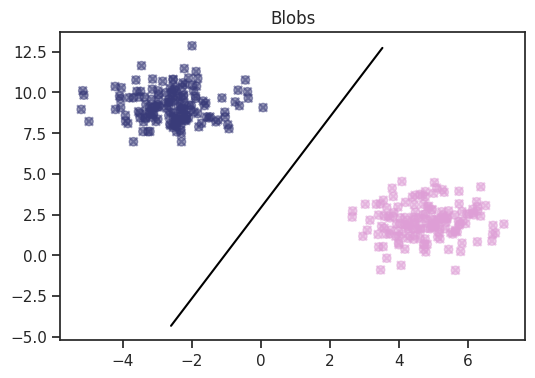

In [7]:
_, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='tab20b', alpha=0.5, label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='tab20b', alpha=0.5, marker='x', label='Predicted')

# plot the decision boundary
boundary_x = np.linspace(X_test[:, 0].min()/2, X_test[:, 0].max()/2, 100).reshape(-1)
boundary_y = - (clf.w[0] * boundary_x + clf.b) / clf.w[1]
ax.plot(boundary_x, boundary_y, color='black', label='Decision Boundary')

ax.set_title('Blobs')
plt.show()